In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from spicy import constants
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr

In [3]:
session = WolframLanguageSession()

In [4]:
i = 1j
pi = np.pi
h = constants.Planck
hbar = constants.hbar
epsilon_0 = constants.epsilon_0
m_p = constants.m_p
m_e = constants.m_e
m_n = constants.m_n
e_c = constants.elementary_charge

hypergeometric function of second kind

In [5]:
# One entry
def U_x(x, k, kp):
    arg = "k:="+str(k).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    arg = "kp:="+str(kp).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    session.evaluate('f[x_]:=HypergeometricU[1-kp*\[ImaginaryI]/(2*2),2,2*2*x*\[ImaginaryI]]* E^(-k*\[ImaginaryI]*x) * x')
    arg = "N[f["+str(x).replace('e', "*10^")+"]]"
    U_numeric = session.evaluate(wlexpr(arg)) 
    U_complex = complex(U_numeric[0], U_numeric[1])
    return U_complex

def Up_x(x, k, kp):
    arg = "k:="+str(k).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    arg = "kp:="+str(kp).replace('e', "*10^")
    session.evaluate(wlexpr(arg))
    session.evaluate('f[x_]:=HypergeometricU[1-kp*\[ImaginaryI]/(2*2),2,2*2*x*\[ImaginaryI]]* E^(-k*\[ImaginaryI]*x) * x')
    arg = "N[f'["+str(x).replace('e', "*10^")+"]]"
    Up_numeric = session.evaluate(wlexpr(arg)) 
    Up_complex = complex(Up_numeric[0], Up_numeric[1])
    return Up_complex  

In [6]:
def B(A, kappa, k ,kp, a):
    num = 2*i*kappa
    den =  Up_x(a, k, kp) * sy.exp(-(sy.I)*kappa*a)
    den += i*kappa * U_x(a, k, kp) * sy.exp(-i*kappa*a)
    return (num/den)*A

def C(A, kappa, k ,kp, a):
    num = 2*(i*kappa * (sy.exp(-i*kappa*a)) * sy.exp(i*kappa*a))
    den =  Up_x(a, k, kp) * sy.exp(-i*kappa*a)
    den += i*kappa * U_x(a, k, kp) * sy.exp(-i*kappa*a)
    return (num/den)*A

In [7]:
def wavefun_1(x, kappa, k, kp, A):
    r = A * sy.exp(i*kappa*x)
    r += B(A,kappa,k,kp,x) * sy.exp(-i*kappa*x)
    return r

def wavefun_2(x, kappa, k, kp, A):
    return C(A,kappa,k,kp,x) * U_x(x, k, kp)

In [8]:
def kappa(m, Q, V0):
    r = 2*m*(Q+V0)
    r /= h**2
    return np.sqrt(r)

def k(m, Q):
    r = 2*m*Q
    r /= hbar**2
    return np.sqrt(r)

def kp(m, Z):
    r = m*(Z-2)*(e_c**2)
    r /= pi*epsilon_0*(hbar**2)
    return r

Example for $^{224}T$


In [9]:
A = 224
a = 7.22 * 10**(-15)
Z = 90
Q = 8.89
V0 = 35
m = 224.020186	
k = k(m,Q)
kappa = kappa(m,Q,V0)
kp = kp(m,Z)

In [10]:
print(k, kappa, kp, a)

5.9845747238740526e+35 2.1163394890069143e+35 1.635835724486526e+45 7.22e-15


In [12]:
U_x(a, k, kp).real

In [ ]:
print(sy.re(wavefun_1(a, kappa, k, kp, A)))

KeyboardInterrupt: 

In [ ]:
radius_values = np.linspace(0, a, 25)
Psi_re = [sy.re(wavefun_1(radius, kappa, k, kp, A).evalf()) for radius in radius_values]

TypeError: Invalid NaN comparison

<function matplotlib.pyplot.show(close=None, block=None)>

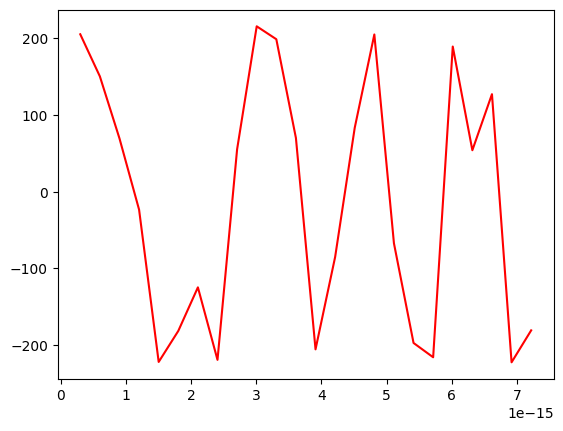

In [ ]:
plt.plot(radius_values, Psi_re, color='red')
plt.show